In [1]:
# modular code
# from master_functions import *
from master_functions_jit import *

In [2]:
# Example usage
np.random.seed(42)
params = [50, 80, 100, 110, 110, 5]  # Example parameter list
# Convert to a Numba typed list
    
# params = [50, 5]  # Example parameter list

# params = [50, 80, 100, 110, 110, 100, 90, 80, 75, 70, 5]  # Example parameter list

# params = [50, 80, 100, 110, 118, 125, 130, 133, 135, 136, 5]  # Example parameter list

params = List([p for p in params])


bl = 20 # baseline
dt = 0.05

ISI = 20  # frequency in Hz
n = len(params) - 1  # number of responses is one less than the length of params
x = np.arange(0, 140, dt)
# Generate the individual and combined alpha responses
# all_resp, y = model_n(params, ISI, n, x)
all_resp, y = model_n(params, ISI, n, x, model='alpha')

# add a baseline
idx = int(bl/dt) - 1

y = np.concatenate([np.zeros(idx), y])
x = np.arange(0, len(y))*dt

all_y = []
for res in all_resp:
    all_y.append(np.concatenate([np.zeros(idx), res]))
    
# add noise    
y = y + np.random.normal(0, 5, len(x))

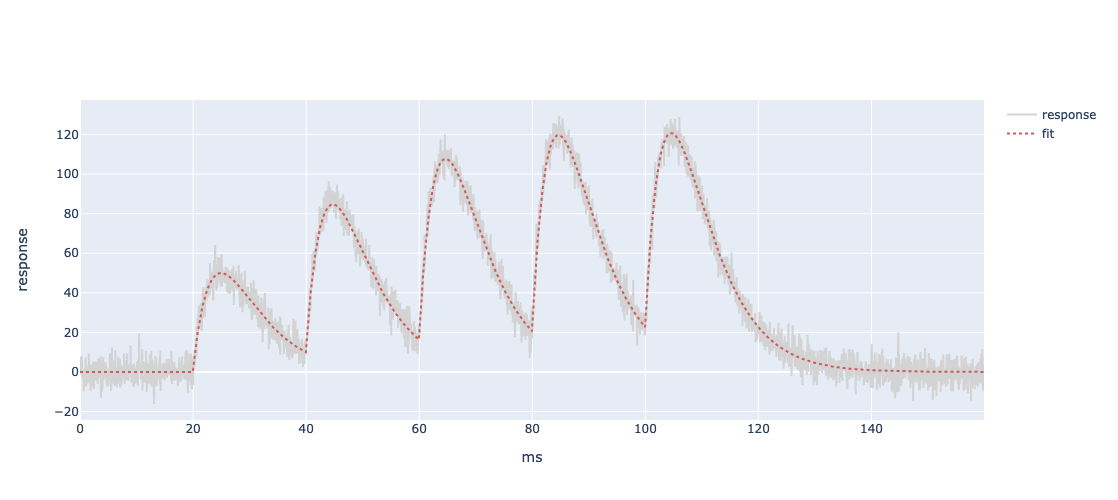

In [3]:
# Create the figure
fig1 = go.Figure()

# Add the original data
fig1.add_trace(go.Scatter(x=x, y=y, name='response', line=dict(color='lightgray')))

# Add the fitted curve
y_fit = np.sum(all_y, axis=0)
fig1.add_trace(go.Scatter(x=x, y=y_fit, name='fit', line=dict(color='indianred', dash='dot')))

# Set the axis labels
fig1.update_layout(width=1000,  height=500, xaxis_title='ms',yaxis_title='response')

fig1.show()   

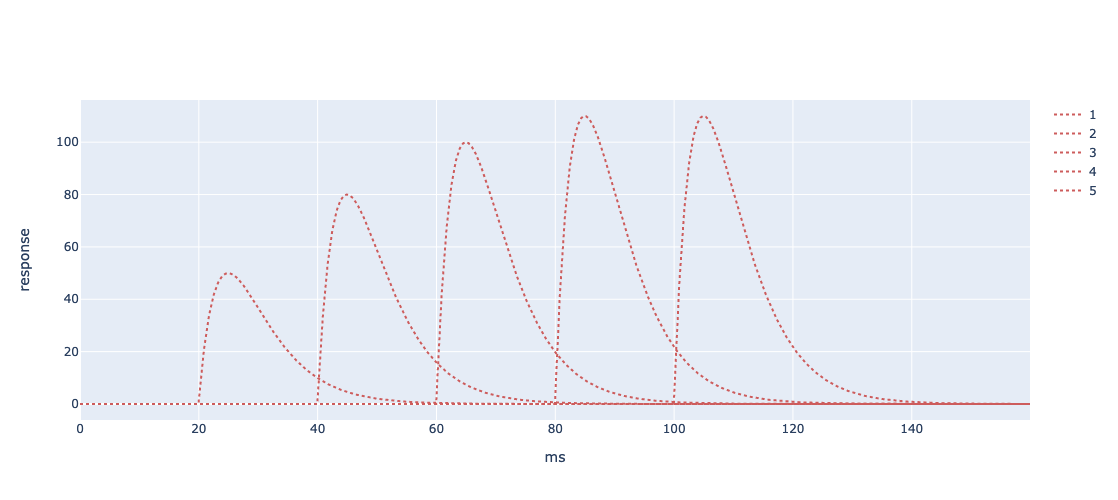

In [4]:
# Create the figure
fig2 = go.Figure()

# Plot each individual response
for i, yi in enumerate(all_y):
    fig2.add_trace(go.Scatter(x=x, y=yi, name=i+1, line=dict(color='indianred', dash='dot')))

# Set the axis labels
fig2.update_layout(width=1000,  height=500, xaxis_title='ms',yaxis_title='response')

fig2.show()   


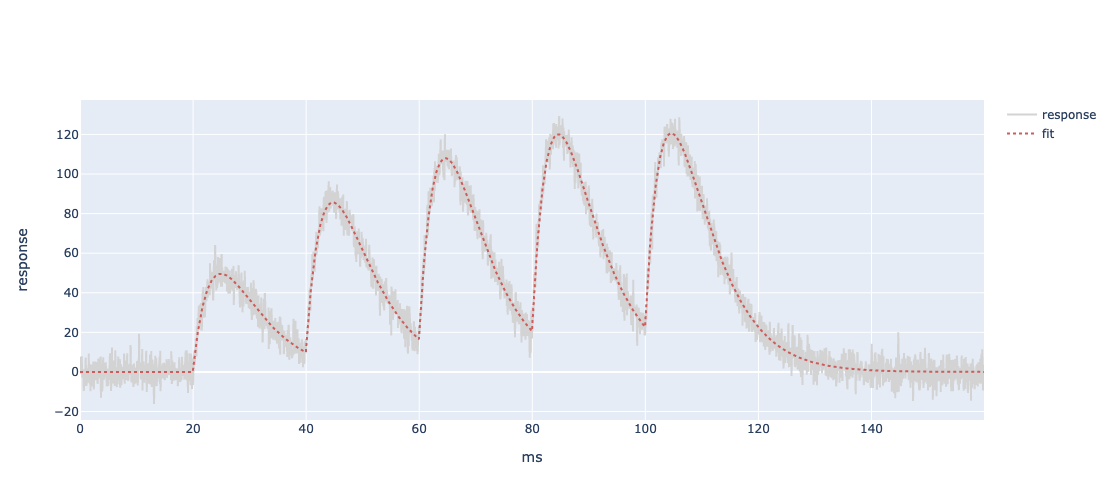

             A1      A2       A3       A4       A5      τ r20-80  d80-20  \
fit:     49.597  81.016  100.237  110.354  109.817  5.003  1.961  10.857   
AIC:  16921.376                                                            

          area  
fit:  6134.044  
AIC:            
CPU times: user 1.27 s, sys: 53.4 ms, total: 1.32 s
Wall time: 1.34 s


In [5]:
np.random.seed(42)
%time nFIT(x=x, y=y, n=n, ISI=ISI, bl=bl, model='alpha', fit_method='DE', N=1)

In [6]:
# Example usage
np.random.seed(42)
params = [50, 80, 100, 5, 20, 30, 25, 15]  # Example parameter list [p11, p12, p13, T1, p21, p22, p23, T2]

params = [50, 80, 100, 110, 110, 5, 20, 30, 25, 15, 10, 15] 

# params = [50, 80, 5, 20, 30, 15] 
params = List([p for p in params])

bl = 20 # baseline
dt = 0.05
ISI = 20  
n = int(len(params)/2) - 1  # number of responses is one less than the length of params
x = np.arange(0, 140, dt)
# # Generate the individual and combined alpha responses
# all_resp, y = alpha2_alt_n(params, ISI, n, x)
all_resp, y = model_n(params, ISI, n, x, model='alpha2')

# add a baseline
idx = int(bl/dt) - 1

y = np.concatenate([np.zeros(idx), y])
x = np.arange(0, len(y))*dt

all_y = []
for res in all_resp:
    all_y.append(np.concatenate([np.zeros(idx), res]))
    
# add noise    
y = y + np.random.normal(0, 5, len(x))


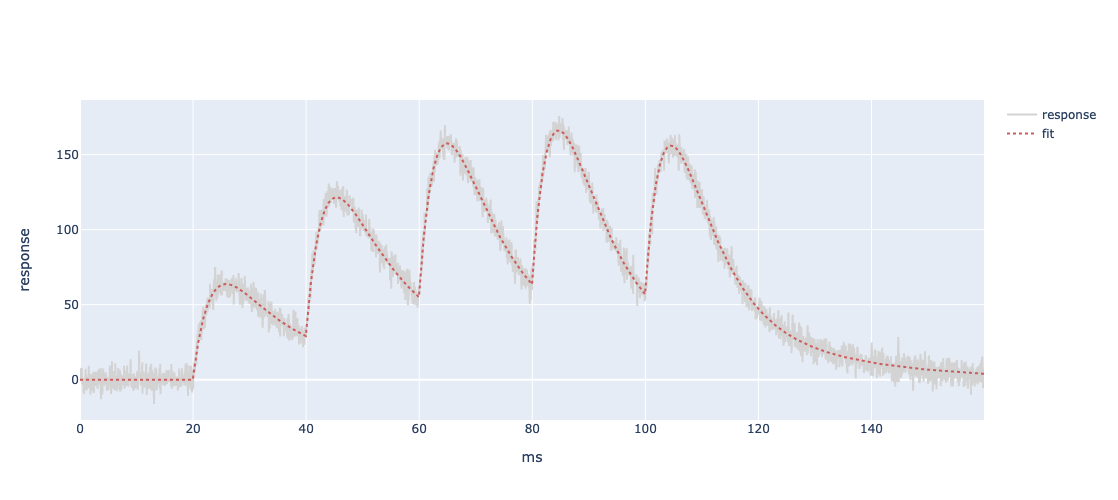

In [7]:
# Create the figure
fig1 = go.Figure()

# Add the original data
fig1.add_trace(go.Scatter(x=x, y=y, name='response', line=dict(color='lightgray')))

# Add the fitted curve
y_fit = np.sum(all_y, axis=0)
fig1.add_trace(go.Scatter(x=x, y=y_fit, name='fit', line=dict(color='indianred', dash='dot')))

# Set the axis labels
# Set the axis labels
fig1.update_layout(width=1000,  height=500, xaxis_title='ms',yaxis_title='response')

fig1.show()  

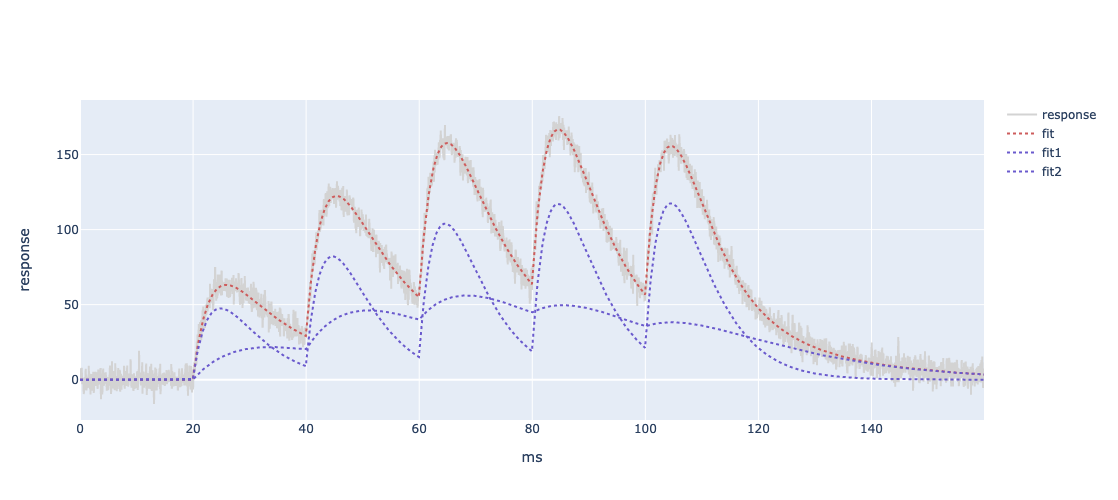

              A1      A2      A3       A4       A5       τ r20-80  d80-20  \
fast:     47.516  77.982  96.925  108.252  107.519   4.922  1.929   10.68   
slow:     21.764  32.932  29.294   18.092   13.434  13.799  5.409  29.942   
AIC:   16927.126                                                            

           area  
fast:  5862.783  
slow:  4332.819  
AIC:             
CPU times: user 8.95 s, sys: 8.42 ms, total: 8.96 s
Wall time: 9.01 s


In [8]:
np.random.seed(42)
%time nFIT(x=x, y=y, n=n, ISI=ISI, bl=bl, model='alpha2', N=30)

In [9]:
# Example usage
np.random.seed(42)
params = [30, 60, 80, 90, 5, 20]  # params of form [A1, A2, A3, A4, T1, T2]
params = List([p for p in params])


bl = 20 # baseline
dt = 0.05
ISI = 20  
n = int(len(params)) - 2  # number of responses is one less than the length of params
x = np.arange(0, 160, dt)
# # Generate the individual and combined alpha responses
# all_resp, y = product_alt_n(params, ISI, n, x)
all_resp, y = model_n(params, ISI, n, x, model='product')

# add a baseline
idx = int(bl/dt) - 1

y = np.concatenate([np.zeros(idx), y])
x = np.arange(0, len(y))*dt

all_y = []
for res in all_resp:
    all_y.append(np.concatenate([np.zeros(idx), res]))
    
# add noise    
y = y + np.random.normal(0, 5, len(x))

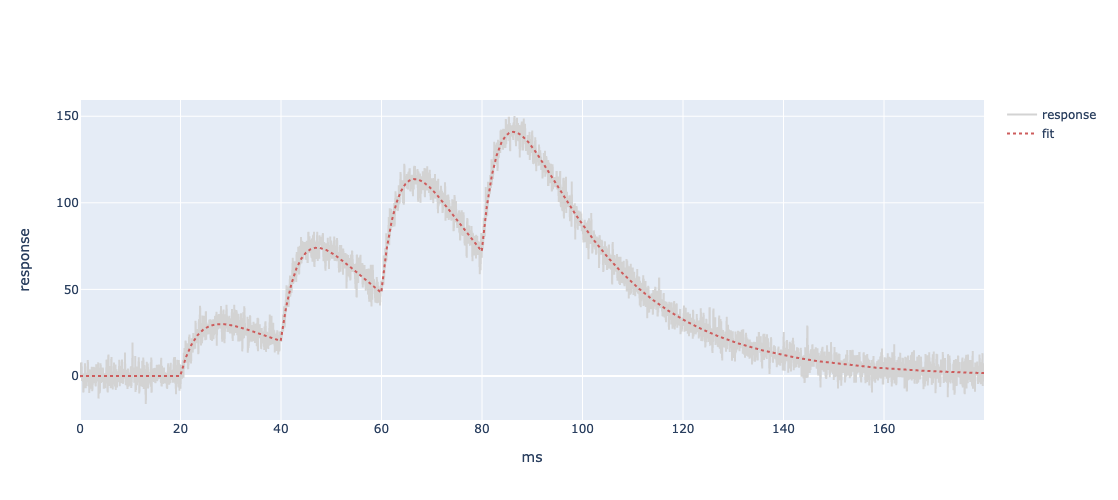

In [10]:
# Create the figure
fig1 = go.Figure()

# Add the original data
fig1.add_trace(go.Scatter(x=x, y=y, name='response', line=dict(color='lightgray')))

# Add the fitted curve
y_fit = np.sum(all_y, axis=0)
fig1.add_trace(go.Scatter(x=x, y=y_fit, name='fit', line=dict(color='indianred', dash='dot')))

# Set the axis labels
# Set the axis labels
fig1.update_layout(width=1000,  height=500, xaxis_title='ms',yaxis_title='response')

fig1.show()  

In [ ]:
%time nFIT(x=x, y=y, n=n, ISI=ISI, bl=bl, model='product', fit_method='LS')

In [ ]:
# sum of 2 product
# params of form [A1, A2, A3, A4, T1, T2]

# Example usage
np.random.seed(42)
params = [50, 80, 100, 5, 10, 20, 30, 15, 15, 30]  # Example parameter list [A11, A12, A13, T11, T12, A21, A22, A23, T21, T22]
params = List([p for p in params])

# params = [50, 5, 10, 100, 15, 30]  

bl = 20 # baseline
dt = 0.05
ISI = 20  
n = int(len(params)/2) - 2  # number of responses is one less than the length of params
x = np.arange(0, 160, dt)
# # Generate the individual and combined alpha responses
# all_resp, y = product2_alt_n(params, ISI, n, x)
all_resp, y = model_n(params, ISI, n, x, model='product2')

# add a baseline
idx = int(bl/dt) - 1
if idx < 0: idx=0

y = np.concatenate([np.zeros(idx), y])
x = np.arange(0, len(y))*dt

all_y = []
for res in all_resp:
    all_y.append(np.concatenate([np.zeros(idx), res]))
    
# add noise    
y = y + np.random.normal(0, 5, len(x))


In [ ]:
# Create the figure
fig1 = go.Figure()

# Add the original data
fig1.add_trace(go.Scatter(x=x, y=y, name='response', line=dict(color='lightgray')))

# Add the fitted curve
y_fit = np.sum(all_y, axis=0)
fig1.add_trace(go.Scatter(x=x, y=y_fit, name='fit', line=dict(color='indianred', dash='dot')))

# Set the axis labels
# Set the axis labels
fig1.update_layout(width=1000,  height=500, xaxis_title='ms',yaxis_title='response')

fig1.show() 


In [ ]:
np.random.seed(42)
%time nFIT(x=x, y=y, n=n, ISI=ISI, bl=bl, model='product2')

In [ ]:
np.random.seed(42)
%time nFIT(x=x, y=y, n=n, ISI=ISI, bl=bl, model='product')

In [ ]:
################ compare to previous code
from master_functions import *

In [ ]:
# generate alpha response
np.random.seed(42) # set a seed to make egs reproducible
params = [50, 5] 
dt = 0.05
x = np.arange(0, 50, dt) 
y = alpha_alt(params, x) + np.random.normal(0,2,len(x))

In [ ]:
np.random.seed(42)
FITalpha(x, y)
nFIT(x=x, y=y, model='alpha')

In [ ]:
np.random.seed(42) 
FITalpha2(x, y)
nFIT(x=x, y=y, model='alpha2')

In [ ]:
np.random.seed(42) 
FITproduct(x, y)
nFIT(x=x, y=y, model='product')

In [ ]:
np.random.seed(42) 
FITproduct2(x, y)
nFIT(x=x, y=y, model='product2')


In [ ]:
######################### fitting and comparing 4 fits to sum of 2 alpha functions #########################
# _alt versions take a1_max not a1 ie a1_max etc is the actual maximum of the alpha synapse
np.random.seed(42) # set a seed to make egs reproducible
params = [35, 5, 20, 25] 
dt = 0.05
x = np.arange(0, 150, dt) 
# y = alpha2(params, x) + np.random.normal(0,2,len(x))
y = alpha2_alt(params, x) + np.random.normal(0,2,len(x))

# y = model_n(params, ISI=0, n=1, x=x, model='alpha2')[1] + np.random.normal(0,2,len(x))


In [ ]:
np.random.seed(42)
FITalpha(x, y)
nFIT(x=x, y=y, model='alpha')

In [ ]:
np.random.seed(42) 
FITalpha2(x, y)
nFIT(x=x, y=y, model='alpha2')

In [ ]:
np.random.seed(42) 
FITproduct(x, y)
nFIT(x=x, y=y, model='product', fit_method='MLE')

In [ ]:
np.random.seed(42) 
FITproduct2(x, y)
nFIT(x=x, y=y, model='product2')

In [ ]:
np.random.seed(42) # set a seed to make egs reproducible
params = [50, 5, 20] 
dt = 0.05
x = np.arange(0, 150, dt) 
y = product_alt(params, x) + np.random.normal(0,2,len(x))


In [ ]:
np.random.seed(42)
FITalpha(x, y)
nFIT(x=x, y=y, model='alpha')

In [ ]:
np.random.seed(42)
FITalpha2(x, y)
nFIT(x=x, y=y, model='alpha2')

In [ ]:
np.random.seed(42)
FITproduct(x, y)
nFIT(x=x, y=y, model='product')

In [ ]:
np.random.seed(42)
FITproduct2(x, y)
nFIT(x=x, y=y, model='product2')

In [ ]:
np.random.seed(42) # set a seed to make egs reproducible
params = [35, 5, 15, 15, 10, 30] 
dt = 0.05
x = np.arange(0, 100, dt) 
# y = product2(params, x) + np.random.normal(0,2,len(x))
y = product2_alt(params, x) + np.random.normal(0,2,len(x))


In [ ]:
np.random.seed(42)
FITalpha(x, y)
nFIT(x=x, y=y, model='alpha')

In [ ]:
np.random.seed(42)
FITalpha2(x, y)
nFIT(x=x, y=y, model='alpha2')

In [ ]:
np.random.seed(42)
FITproduct(x, y)
nFIT(x=x, y=y, model='product')

In [ ]:
np.random.seed(42)
FITproduct2(x, y)
nFIT(x=x, y=y, model='product2')

In [ ]:
# batch examples

In [ ]:
np.random.seed(42) # set a seed to make egs reproducible
bl = 20 # baseline
dt = 0.05
ISI = 20  
xmax = 220
rms = 2
n = 1

idx = int(bl/dt) - 1

x1 = np.arange(0, xmax-bl, dt)

params1 = [50, 10] 
params1 = List([p for p in params1])
y1 = model_n(params1, ISI=ISI, n=n, x=x1, model='alpha')[1]

y1 = np.concatenate([np.zeros(idx), y1])
x = np.arange(0, len(y1))*dt
y1 = y1 + np.random.normal(0, rms, len(x))

params2 = [30, 5, 35, 25] 
params2 = List([p for p in params2])
y2 = model_n(params2, ISI=ISI, n=n, x=x1, model='alpha2')[1]
y2 = np.concatenate([np.zeros(idx), y2])
y2 = y2 + np.random.normal(0, rms, len(x))

params3 = [50, 5, 20] 
params3 = List([p for p in params3])
y3 = model_n(params3, ISI=ISI, n=n, x=x1, model='product')[1]
y3 = np.concatenate([np.zeros(idx), y3])
y3 = y3 + np.random.normal(0, rms, len(x))

params4 = [20, 5, 10, 40, 15, 55] 
params4 = List([p for p in params4])
y4 = model_n(params4, ISI=ISI, n=n, x=x1, model='product2')[1]
y4 = np.concatenate([np.zeros(idx), y4])
y4 = y4 + np.random.normal(0, rms, len(x))

df = pd.DataFrame({'y1': y1, 'y2': y2, 'y3': y3, 'y4': y4})


In [ ]:
np.random.seed(42) # set a seed to make egs reproducible
bl = 20 # baseline
dt = 0.05
ISI = 50  
xmax = 240
rms = 2
n = 2

idx = int(bl/dt) - 1

x1 = np.arange(0, xmax-bl, dt)

params1 = [50, 70, 10] 
params1 = List([p for p in params1])
y1 = model_n(params1, ISI=ISI, n=n, x=x1, model='alpha')[1]

y1 = np.concatenate([np.zeros(idx), y1])
x = np.arange(0, len(y1))*dt
y1 = y1 + np.random.normal(0, rms, len(x))

# params2 = [30, 60, 5, 35, 45, 25] 
params2 = [50, 80, 5, 20, 30, 15] 
params2 = List([p for p in params2])
y2 = model_n(params2, ISI=ISI, n=n, x=x1, model='alpha2')[1]
y2 = np.concatenate([np.zeros(idx), y2])
y2 = y2 + np.random.normal(0, rms, len(x))

params3 = [50, 70, 5, 20] 
params3 = List([p for p in params3])
y3 = model_n(params3, ISI=ISI, n=n, x=x1, model='product')[1]
y3 = np.concatenate([np.zeros(idx), y3])
y3 = y3 + np.random.normal(0, rms, len(x))

params4 = [20, 30, 5, 10, 40, 60, 15, 55] 
params4 = List([p for p in params4])
y4 = model_n(params4, ISI=ISI, n=n, x=x1, model='product2')[1]
y4 = np.concatenate([np.zeros(idx), y4])
y4 = y4 + np.random.normal(0, rms, len(x))

df = pd.DataFrame({'y1': y1, 'y2': y2, 'y3': y3, 'y4': y4})


In [ ]:
# Create the figure
fig1 = go.Figure()

# Add the original data
fig1.add_trace(go.Scatter(x=x, y=y2, name='response', line=dict(color='lightgray')))

# Add the fitted curve
y_fit = np.sum(all_y, axis=0)
fig1.add_trace(go.Scatter(x=x, y=y4, name='fit', line=dict(color='indianred')))

# Set the axis labels
# Set the axis labels
fig1.update_layout(width=1000,  height=500, xaxis_title='ms',yaxis_title='response')

fig1.show() 


In [ ]:
np.random.seed(42) # set a seed to make egs reproducible
out = nFITbatch(x, df, n=n, ISI=ISI, bl=bl, model='alpha2')

In [ ]:
out[0]

In [ ]:
out[1]

In [ ]:
# common definitions
nsims = 10000
dt = 0.05
x = np.arange(0, 100, dt) 
rms = 2
criterion = 'AIC'
fit_method = 'LS'
N = 10

bl = 20 # baseline
n = 1 # number of responses in a train
ISI = 50 # inter-stimulus interval
xmax = 150

fit_model = ['alpha', 'alpha2', 'product', 'product2']
fits_keys = ['fits1', 'fits2', 'fits3', 'fits4']
AIC_keys = ['AIC1', 'AIC2', 'AIC3', 'AIC4']
    
col_names_list = { 
    'fits1': get_column_names(model='alpha', n=n),
    'fits2': get_column_names(model='alpha2', n=n),
    'fits3': get_column_names(model='product', n=n),
    'fits4': get_column_names(model='product2', n=n)
}

idx = int(bl/dt) - 1
x1 = np.arange(0, xmax-bl, dt)
x = np.arange(0, xmax-dt, dt)


In [ ]:
###################################################### sim1 ######################################################
# simulates alpha function with params specified below and fits 4 functions for comparison
# default optimised starting values from curve_fit 
ylist1 = []
params = [50, 5] 
params = List([p for p in params])

np.random.seed(42) 
for ii in list(range(nsims)):
    y = model_n(params, ISI=ISI, n=n, x=x1, model='alpha')[1] 
    y = np.concatenate([np.zeros(idx), y]) + np.random.normal(0, rms, len(x))    
    ylist1.append(y)

# Create single eg figure
all_y, y = model_n(params, ISI=ISI, n=n, x=x1, model='alpha')
# Add the fitted curve
y_fit = np.concatenate([np.zeros(idx), np.sum(all_y, axis=0)])
y = np.concatenate([np.zeros(idx), y]) + np.random.normal(0, rms, len(x))    

fig1 = go.Figure()
# Add the original data
fig1.add_trace(go.Scatter(x=x, y=y, name='response', line=dict(color='lightgray')))
# Add the fitted curve
fig1.add_trace(go.Scatter(x=x, y=y_fit, name='fit', line=dict(color='indianred', dash='dot')))
# Set the axis labels
fig1.update_layout(width=1000,  height=500, xaxis_title='ms',yaxis_title='response')
fig1.show()  


In [ ]:
# run sim
sim1 = {
    'fits1':   [],
    'fits2':   [],
    'fits3':   [],
    'fits4':   [],
    'AIC1':   [],
    'AIC2':   [],
    'AIC3':   [],
    'AIC4':   [],
}

for y in tqdm(ylist1):
    for model, fits_key, AIC_key in zip(fit_model, fits_keys, AIC_keys):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            results = nFIT(x=x, y=y, n=n, ISI=ISI, bl=bl, model=model, criterion=criterion, plot=False, fit_method=fit_method, N=N, show_results=True)
            fits, AIC = results
        sim1[fits_key].append(fits)
        sim1[AIC_key].append(AIC)

In [ ]:
df1_fits1 = extract_summary_stats(sim1, 'fits1', col_names=col_names_list['fits1'])
print(df1_fits1)

In [ ]:
print(IC_model(data_dict=sim1, model=0, criterion='AIC'))

In [ ]:
###################################################### sim2 ######################################################
# simulates alpha2 function with params specified below and fits 4 functions for comparison
# default optimised starting values from curve_fit 
ylist2 = []
params = [35, 5, 25, 20] 
params = List([p for p in params])

np.random.seed(42) 
for ii in list(range(nsims)):
    y = model_n(params, ISI=ISI, n=n, x=x1, model='alpha2')[1] 
    y = np.concatenate([np.zeros(idx), y]) + np.random.normal(0, rms, len(x))    
    ylist2.append(y)

# Create single eg figure
all_y, y = model_n(params, ISI=ISI, n=n, x=x1, model='alpha2')
# Add the fitted curve
y_fit = np.concatenate([np.zeros(idx), np.sum(all_y, axis=0)])
y = np.concatenate([np.zeros(idx), y]) + np.random.normal(0, rms, len(x))    

fig2 = go.Figure()
# Add the original data
fig2.add_trace(go.Scatter(x=x, y=y, name='response', line=dict(color='lightgray')))
# Add the fitted curve
fig2.add_trace(go.Scatter(x=x, y=y_fit, name='fit', line=dict(color='indianred', dash='dot')))
# Set the axis labels
fig2.update_layout(width=1000,  height=500, xaxis_title='ms',yaxis_title='response')
fig2.show()  



In [ ]:
# run sim
sim2 = {
    'fits1':   [],
    'fits2':   [],
    'fits3':   [],
    'fits4':   [],
    'AIC1':   [],
    'AIC2':   [],
    'AIC3':   [],
    'AIC4':   [],
}

for y in tqdm(ylist2):
    for model, fits_key, AIC_key in zip(fit_model, fits_keys, AIC_keys):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            results = nFIT(x=x, y=y, n=n, ISI=ISI, bl=bl, model=model, criterion=criterion, plot=False, fit_method=fit_method, N=N, show_results=True)
            fits, AIC = results
        sim2[fits_key].append(fits)
        sim2[AIC_key].append(AIC)

In [ ]:
df2_fits2 = extract_summary_stats(sim2, 'fits2', col_names=col_names_list['fits2'])
print(df2_fits2)

In [ ]:
print(IC_model(data_dict=sim2, model=1, criterion='AIC'))

In [ ]:
###################################################### sim3 ######################################################
# simulates alpha2 function with params specified below and fits 4 functions for comparison
# default optimised starting values from curve_fit 
ylist3 = []
params = [50, 4, 8] 
params = List([p for p in params])

np.random.seed(42) 
for ii in list(range(nsims)):
    y = model_n(params, ISI=ISI, n=n, x=x1, model='product')[1] 
    y = np.concatenate([np.zeros(idx), y]) + np.random.normal(0, rms, len(x))    
    ylist3.append(y)

# Create single eg figure
all_y, y = model_n(params, ISI=ISI, n=n, x=x1, model='product')
# Add the fitted curve
y_fit = np.concatenate([np.zeros(idx), np.sum(all_y, axis=0)])
y = np.concatenate([np.zeros(idx), y]) + np.random.normal(0, rms, len(x))    

fig3 = go.Figure()
# Add the original data
fig3.add_trace(go.Scatter(x=x, y=y, name='response', line=dict(color='lightgray')))
# Add the fitted curve
fig3.add_trace(go.Scatter(x=x, y=y_fit, name='fit', line=dict(color='indianred', dash='dot')))
# Set the axis labels
fig3.update_layout(width=1000,  height=500, xaxis_title='ms',yaxis_title='response')
fig3.show()  


In [ ]:
# run sim
sim3 = {
    'fits1':   [],
    'fits2':   [],
    'fits3':   [],
    'fits4':   [],
    'AIC1':   [],
    'AIC2':   [],
    'AIC3':   [],
    'AIC4':   [],
}

for y in tqdm(ylist3):
    for model, fits_key, AIC_key in zip(fit_model, fits_keys, AIC_keys):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            results = nFIT(x=x, y=y, n=n, ISI=ISI, bl=bl, model=model, criterion=criterion, plot=False, fit_method=fit_method, N=N, show_results=True)
            fits, AIC = results
        sim3[fits_key].append(fits)
        sim3[AIC_key].append(AIC)

In [ ]:
df3_fits3 = extract_summary_stats(sim3, 'fits3', col_names=col_names_list['fits3'])
print(df3_fits3)

In [ ]:
print(IC_model(data_dict=sim3, model=2, criterion='AIC'))

In [ ]:
###################################################### sim4 ######################################################
# simulates alpha2 function with params specified below and fits 4 functions for comparison
# default optimised starting values from curve_fit 
ylist4 = []
params = [35, 4, 8, 25, 20, 30] 
params = List([p for p in params])

np.random.seed(42) 
for ii in list(range(nsims)):
    y = model_n(params, ISI=ISI, n=n, x=x1, model='product2')[1] 
    y = np.concatenate([np.zeros(idx), y]) + np.random.normal(0, rms, len(x))    
    ylist4.append(y)


# Create single eg figure
all_y, y = model_n(params, ISI=ISI, n=n, x=x1, model='product2')
# Add the fitted curve
y_fit = np.concatenate([np.zeros(idx), np.sum(all_y, axis=0)])
y = np.concatenate([np.zeros(idx), y]) + np.random.normal(0, rms, len(x))    

fig4 = go.Figure()
# Add the original data
fig4.add_trace(go.Scatter(x=x, y=y, name='response', line=dict(color='lightgray')))
# Add the fitted curve
fig4.add_trace(go.Scatter(x=x, y=y_fit, name='fit', line=dict(color='indianred', dash='dot')))
# Set the axis labels
fig4.update_layout(width=1000,  height=500, xaxis_title='ms',yaxis_title='response')
fig4.show()  



In [ ]:
# run sim
sim4 = {
    'fits1':   [],
    'fits2':   [],
    'fits3':   [],
    'fits4':   [],
    'AIC1':   [],
    'AIC2':   [],
    'AIC3':   [],
    'AIC4':   [],
}

for y in tqdm(ylist4):
    for model, fits_key, AIC_key in zip(fit_model, fits_keys, AIC_keys):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            results = nFIT(x=x, y=y, n=n, ISI=ISI, bl=bl, model=model, criterion=criterion, plot=False, fit_method=fit_method, N=N, show_results=True)
            fits, AIC = results
        sim4[fits_key].append(fits)
        sim4[AIC_key].append(AIC)

In [ ]:
df4_fits4 = extract_summary_stats(sim4, 'fits4', col_names=col_names_list['fits4'])
print(df4_fits4)

In [ ]:
print(IC_model(data_dict=sim4, model=3, criterion='AIC'))

In [ ]:
################################### to save for analysis ###################################
names = ['sim1', 'sim2', 'sim3', 'sim4']

# Create a dictionary only with the variables that are defined
list_dict = {}
for name in names:
    var = locals().get(name)
    if var is not None:
        list_dict[name] = var

# # Print out the names of variables that have been found and added to the dictionary
# print(f"Variables found and added to the dictionary: {', '.join(list_dict.keys())}")

# create dir to save data in
sim_dir = "curve fits"
if not os.path.exists(sim_dir):
    os.mkdir(sim_dir)

# Save the dictionaries as pickle files for each name
for name, sim_data in list_dict.items():
    file_path = '{}/{}.pickle'.format(sim_dir, name)
    with open(file_path, 'wb') as handle:
        pickle.dump(sim_data, handle, protocol=pickle.HIGHEST_PROTOCOL)
        